In [1]:
%load_ext autoreload
%autoreload 2
from custom_imports import *
from mri_project.utility import *
from mri_project.contour_ops import *

In [2]:
image_dir = "/home/bzr0014/git/sesek2/mri_analysis/"

In [3]:
all_images = glob.glob(f"{image_dir}/**/*jpg", recursive=True)
non_raw_images = [x for x in all_images if '/raw/' not in x.lower()]
len(non_raw_images)

832

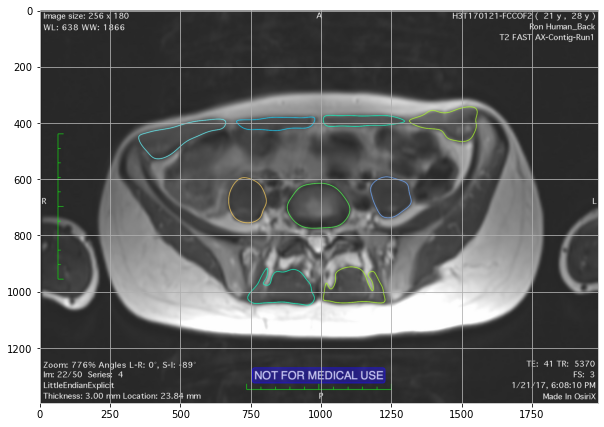

In [4]:
plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(cv2.imread(non_raw_images[10]))

In [5]:
bar_lengths = pd.read_csv("bar_lengths.csv").set_index('file')
bar_lengths

,length in pixels
file,
4-COF7-22:50Behnam.jpg,519
2-COF7-12:50Behnam.jpg,519
1-COF7-6:50Behnam.jpg,519
3-COF7-17:50Behnam.jpg,519
1-COF5-5:50Behnam.jpg,522
4-COF5-21:50Behnam.jpg,519
2-COF5-11:50Behnam.jpg,519
3-COF5-16:50Behnam.jpg,519
1-COF2-6:50Behnam.jpg,519


In [6]:
non_raw_images

['/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/4-COF7-22:50Behnam.jpg',
 '/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/2-COF7-12:50Behnam.jpg',
 '/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/1-COF7-6:50Behnam.jpg',
 '/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/3-COF7-17:50Behnam.jpg',
 '/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F5/1-COF5-5:50Behnam.jpg',
 '/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F5/4-COF5-21:50Behnam.jpg',
 '/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F5/2-COF5-11:50Behnam.jpg',
 '/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F5/3-COF5-16:50Behnam.jpg',
 '/home/bz

In [7]:
file = np.random.choice(non_raw_images)
# file = '/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F3/4-COF3-22:50Behnam.jpg'
img = cv2.imread(file)

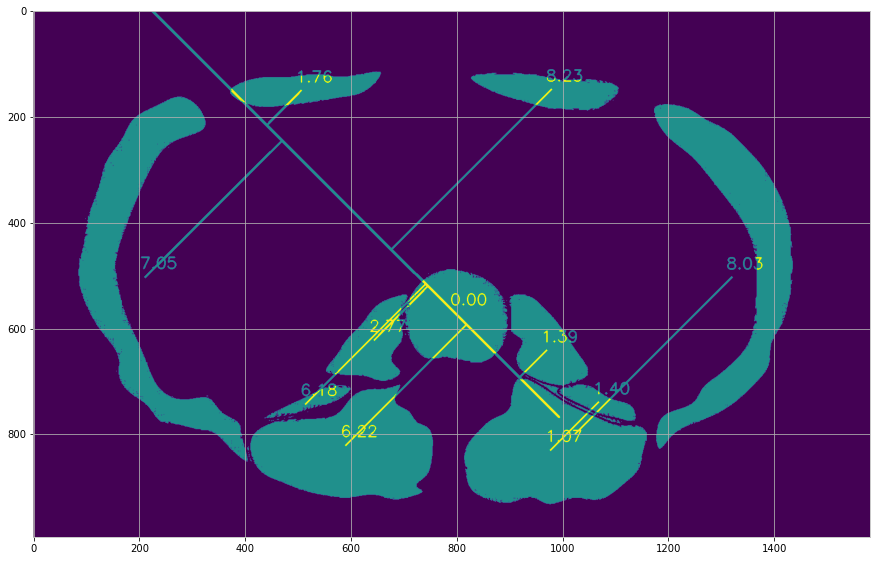

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
lever_arms, levers = show_lever_arms(img[200:-200, 200:-200], 90, scale=10/519, plot=True, ax=ax)

In [40]:
for x in lever_arms:
    print(x)

[704.1580310880829, 666.7357512953367, 0.019267822736030827, 0.007871095880111046]
[548.555900621118, 683.3571428571429, 0.019267822736030827, 2.3543146470626692]
[872.7586206896551, 694.3793103448276, 0.019267822736030827, 1.912585015088987]
[834.0, 858.5438596491229, 0.019267822736030827, 0.8521230689686761]
[839.4296296296296, 504.6074074074074, 0.019267822736030827, 4.044027093259995]
[596.9942857142858, 488.29714285714283, 0.019267822736030827, 0.9632067268747546]
[555.1224899598394, 854.3192771084338, 0.019267822736030827, 4.594106643296493]
[424.84776119402983, 746.9402985074627, 0.019267822736030827, 4.9060476876492904]
[995.1280991735537, 765.3471074380166, 0.019267822736030827, 2.6129025001710917]
[1080.816733067729, 637.9721115537849, 0.019267822736030827, 5.515768346809467]
[342.684375, 577.94375, 0.019267822736030827, 3.722997246344849]


In [70]:
all_lever_arms = []
for file in non_raw_images:
    print(file)
    img = cv2.imread(file)
    lever_arms, levers = show_lever_arms(img, 45, scale=10/bar_lengths.loc[file.split("/")[-1]].values, plot=False)
    all_lever_arms.append((file, lever_arms, levers))

/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/4-COF7-22:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/2-COF7-12:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/1-COF7-6:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/3-COF7-17:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F5/1-COF5-5:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F5/4-COF5-21:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F5/2-COF5-11:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F5/3-COF5-16:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Co

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F2/3-COF2-17:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F2/4-COF2-22:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F2/2-COF2-11:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F1/3-COF1-16:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F1/2-COF1-10:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F1/1-COF1-4:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F1/4-COF1-21:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F3/2-COF3-11:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.C

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F6/3-COF6-16:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F6/2-COF6-10:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F6/4-COF6-22:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F6/1-COF6-4:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M3/3-CO3-14:50PreBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M3/4-CO3-20:50PreBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M3/2-CO3-8:50PreBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M3/1-CO3-3:50PreBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M5/2-CO5-10:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M5/4-CO5-21:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M1/2-CO1-10:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M1/4-CO1-22:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M1/1-CO1-4:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M1/3-CO1-15:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M6/1-CO6-4:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Male/Subject M6/2-CO6-10:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/C

muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Female/Subject F4B/2-COF4B-10:50BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Female/Subject F4B/1-COF4B-4:50BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Female/Subject F4B/3-COF4B-15:50BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Female/Subject F5B/3-COF5B-17:50BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Female/Subject F5B/4-COF5B-22:50BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Female/Subject F5B/1-COF5B-6:50BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Female/Subject F5B/2-COF5B-11:50BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Female/Subject F3B/2-COF3B-10:50B

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M2B/2-COM2B-11:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M2B/1-COM2B-5:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M2B/4-COM2B-22:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M2B/3-COM2B-17:50Behnam.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M1B/1-COM1B-2:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M1B/3-COM1B-14:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M1B/4-COM1B-21:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M1B/2-COM1B-9:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M6B/3-COM6B-15:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M6B/2-COM6B-9:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M6B/4-COM6B-20:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Post/Male/Subject M6B/1-COM6B-4:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysi

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM3B/2-WM3B-9:50-BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM3B/3-WM3B-15:50-BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM3B/1-WM3B-3:50-BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM1B/2-WM1B-9:50-BehnamPost.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM1B/1-WM1B-3:50-BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM1B/3-WM1B-15:50-BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM1B/4-WM1B-21:50-BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM8B/2-WM8B-9:50-BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM8B/3-WM8B-16:50-BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM8B/4-WM8B-22:50-BehnamPost.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Post/Male/Subject WM8B/1-WM8B-5:50-BehnamPost.jpg
/home/bzr0014/git/sesek

muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/2-FCWF6-5:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/1-FCWF6-1:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/3-FCWF4-12:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/2-FCWF4-6:50Behnam.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/1-FCWF4-1:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/4-FCWF4-18:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/3-FCWF1-16:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/1-FCWF1-5:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/4-FCWF1-21:50Behnam.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/2-FCWF1-10:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM4/1-FCWM4-2:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM4/4-FCWM4-21:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM4/2-FCWM4-8:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM4/3-FCWM4-15:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM9/1-FCWM9-1:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM9/2-FCWM9-4:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight 

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/3-FCWM6-11:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/2-FCWM6-5:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/1-FCWM6-1:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM1/4-FCWM1-21:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM1/3-FCWM1-16:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM1/1-FCWM1-4:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight Lifting/Weight Lifting - Pre/Male/Subject WM1/2-FCWM1-10:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Weight L

muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F7/4.COF7-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F7/2.COF7-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F5/2.COF5-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F5/3.COF5-10:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F5/4.COF5-14:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F5/1.COF5-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F2/2.COF2-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject 

muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F1/2.COF1-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F3/2.COF3-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F3/1.COF3-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F3/4.COF3-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F3/3.COF3-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F4/1.COF4-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject F4/3.COF4-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Female/Subject 

muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Male/Subject M6/3.CO6-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Male/Subject M6/2.CO6-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Male/Subject M4/3.CO4-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Male/Subject M4/1.CO4-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Male/Subject M4/2.CO4-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Male/Subject M4/4.CO4-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Male/Subject M2/2.CO2RR-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Pre/Controls-Male/Subject M2/4.CO2RR-15:16.jpg


muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F6B/3.COF6B-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F6B/2.COF6B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F1B/2.COF1B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F1B/3.COF1B-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F1B/1.COF1B-2:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F1B/4.COF1B-15:16.jpg


muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F7B/3.COF7B-10:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F7B/1.COF7B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F7B/2.COF7B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F7B/4.COF7B-16:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F4B/4.COF4B-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F4B/1.COF4B-3:16.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F4B/2.COF4B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F4B/3.COF4B-10:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F5B/2.COF5B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F5B/4.COF5B-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F5B/1.COF5B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F5B/3.COF5B-11:16.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F3B/4.COF3B-14:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F3B/2.COF3B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F3B/3.COF3B-10:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F3B/1.COF3B-2:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F2B/2.COF2B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F2B/4.COF2B-15:16.jpg


muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F2B/1.COF2B-4:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Female/Subject F2B/3.COF2B-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M2B/1.COM2B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M2B/2.COM2B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M2B/3.COM2B-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M2B/4.COM2B-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M1B/2.COM1B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M1B/1.COM1B-2:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.M

muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M6B/4.COM6B-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M6B/3.COM6B-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M6B/1.COM6B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M6B/2.COM6B-6:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M3B/3.COM3B-10:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M3B/2.COM3B-6:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M3B/4.COM3B-14:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Control/Control - Post/Male/Subject M3B/1.COM3B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Mult

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF2B/3.WF2B-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF2B/1.WF2B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF2B/2.WF2B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF2B/4.WF2B-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF4B/2.WF4B-9:50.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF4B/4.WF4B-21:50.jpg


muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF4B/3.WF4B-15:50.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF4B/1.WF4B-3:50.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF5B/1.WF5B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF5B/2.WF5B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF5B/4.WF5B-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Female/Post-training/Subject WF5B/3.WF5B-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Fema

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W8B/2.WM8B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W8B/4.WM8B-14:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W8B/1.WM8B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W2B/3.WM02B-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W2B/1.WM02B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W2B/2.WM02B-6:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Li

muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W4B/1.WM4B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W4B/3.WM4B-10:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W4B/4.WM4B-14:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W4B/2.WM4B-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W3B/1.WM3B-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Post/Male/Weight Lifting - Post/Subject W3B/2.WM3B-6:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifti

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF3/4.FCWF3-14:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF3/3.FCWF3-10:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/4.FCWF6-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/1.FCWF6-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/3.FCWF6-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/2.FCWF6-7:16.jpg


muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/3.REWF4-11:16PreBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/4.REWF4-15:16PreBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/1.REWF4-2:16PreBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/2.REWF4-6:16PreBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/1.FCWF1-2:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/2.FCWF1-6:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/4.FCWF1-14:16.jpg
/home/bzr0014/git/sesek2/mri_analys

muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Male/Subject W4/3.FCWM4-11:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Male/Subject W4/4.FCWM4-15:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Male/Subject W4/1.FCWM4-3:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/1.Multigroup Set#1_DONE/Weight Lifting/Weight Lifting - Pre/Male/Subject W4/2.FCWM4-7:16.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Female/Subject F7/3-COF7-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Female/Subject F7/1-COF7-2:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Female/Subject F7/4-COF7-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Female/Subject F7/2-COF7-7:16RepBeh.

muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M5/4-CO5-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M5/2-CO5-6:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M5/3-CO5-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M5/1-CO5-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M1/1-CO1-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M1/2-CO1-7:16RepBeh.jpg


muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M1/4-CO1-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M1/3-CO1-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M6/1-CO6-1:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M6/3-CO6-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M6/4-CO6-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M6/2-CO6-7:16RepBeh.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M4/1-CO4-2:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M4/2-CO4-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M4/3-CO4-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M4/4-CO4-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M2/1-CO2RR-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M2/3-CO2RR-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M2/2-CO2RR-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Pre/Male/Subject M2/4-CO2RR-14:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Con

muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F1B/4-COF1B-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F1B/3-COF1B-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F1B/2-COF1B-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F1B/1-COF1B-2:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F7B/4-COF7B-16:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F7B/3-COF7B-10:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F7B/1-COF7B-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F7B/2-COF7B-7:16RepBeh.jpg
/home/bzr0014/git/se

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F3B/2-COF3B-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F3B/4-COF3B-14:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F3B/3-COF3B-10:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F2B/1-COF2B-4:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F2B/3-COF2B-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F2B/2-COF2B-7:16RepBeh.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Female/Subject F2B/4-COF2B-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M2B/2-COM2B-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M2B/3-COM2B-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M2B/1-COM2B-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M2B/4-COM2B-15:16RepBeh.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M1B/4-COM1B-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M1B/1-COM1B-2:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M1B/2-COM1B-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M1B/3-COM1B-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M6B/1-COM6B-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M6B/3-COM6B-11:16RepBeh.jpg


muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M6B/4-COM6B-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M6B/2-COM6B-6:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M3B/2-COM3B-6:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M3B/4-COM3B-14:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M3B/3-COM3B-10:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M3B/1-COM3B-3:16RepBeh.jpg


muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M4B/3-COM4B-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M4B/2-COM4B-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M4B/1-COM4B-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M4B/4-COM4B-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M5B/1-COM5B-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M5B/4-COM5B-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M5B/2-COM5B-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Control/Control - Post/Male/Subject M5B/3-COM5B-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysi

muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF5B/2-WF5B-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF1B/3-WF1B-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF1B/4-WF1B-14:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF1B/2-WF1B-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF1B/1-WF1B-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Post/Male/Subject WM6B/2-WM6B-7:16RepPre.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Post/Male/Subject WM6B/1-WM6B-2:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup

muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF2/3-WF2-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF3/1-WF3-2:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF3/3-WF3-10:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF3/4-WF3-14:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF3/2-WF3-6:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/2-WF6-7:16RepBeh.jpg


muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/1-WF6-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/4-WF6-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF6/3-WF6-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/1-WF4RE-2:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/4-WF4RE-15:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/3-WF4RE-11:16RepBeh.jpg


muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF4/2-WF4RE-6:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/1-WF1-2:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/4-WF1-14:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/3-WF1-10:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF1/2-WF1-6:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM4/2-WM4-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM4/1-WM4-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifti

muscles not of size 9 or 11
muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM9/1-WM9-3:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM9/4-WM9-14:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/4-WM6-14:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/3-WM6-11:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/2-WM6-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/1-WM6-2:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM1/2-WM1-7:16RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/2.Multigroup Set#2/Weight Lifting/Weight L

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Pre/Male/Subject M1/2-CO1-10:50Rep-Beh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Pre/Male/Subject M1/1-CO1-4:50Rep-Beh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Pre/Male/Subject M1/4-CO1-22:50Rep-Beh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Pre/Male/Subject M6/4-CO6-21:50Rep-Beh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Pre/Male/Subject M6/1-CO6-4:50Rep-Beh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Pre/Male/Subject M6/2-CO6-10:50Rep-Beh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Pre/Male/Subject M6/3-CO6-16:50Rep-Beh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Pre/Male/Subject M4/3-CO4-12:50Rep-Beh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/C

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Post/Male/Subject M5B/2-COM5B-9:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF6B/4-WF6B-20:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF6B/1-WF6B-4:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF6B/2-WF6B-10:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF6B/3-WF6B-16:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF3B/3-WF3B-16:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Female/Subject WF3B/4-WF3B-22:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/We

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Male/Subject WM1B/1-WM1B-3:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Male/Subject WM1B/2-WM1B-9:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Male/Subject WM8B/3-WM8B-16:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Male/Subject WM8B/2-WM8B-9:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Male/Subject WM8B/1-WM8B-5:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Post/Male/Subject WM8B/4-WM8B-22:50RepBeh.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF5/4-FCWF5-22:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF5/1-FCWF5-3:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF2/4-FCWF2-21:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF2/2-FCWF2-10:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF2/1-FCWF2-4:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF2/3-FCWF2-16:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF3/2-FCWF3-10:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Female/Subject WF3/3-FCWF3-16:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Con

muscles not of size 9 or 11


/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM9/1-FCWM9-1:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM9/4-FCWM9-16:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/1-FCWM6-1:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/4-FCWM6-17:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/3-FCWM6-11:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM6/2-FCWM6-5:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Weight Lifting/Weight Lifting - Pre/Male/Subject WM1/1-FCWM1-4:50Beh-Rep.jpg
/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/We

In [68]:
all_lever_arms[4][1]

[[1008.8376068376068,
  739.7247863247864,
  array([0.01915709]),
  array([0.0066873])],
 [1197.1877729257642,
  764.740174672489,
  array([0.01915709]),
  array([0.93138325])],
 [836.6308943089431,
  771.669918699187,
  array([0.01915709]),
  array([1.83454381])],
 [1283.7312775330397,
  872.4977973568282,
  array([0.01915709]),
  array([0.34134274])],
 [822.4593837535014,
  959.9719887955182,
  array([0.01915709]),
  array([5.27116509])],
 [738.5249343832021,
  856.5800524934383,
  array([0.01915709]),
  array([4.05657944])],
 [1208.7196162046907,
  976.2174840085288,
  array([0.01915709]),
  array([2.72697905])],
 [850.3427230046948,
  345.65727699530515,
  array([0.01915709]),
  array([5.80590926])],
 [1205.0402144772117,
  340.43163538873995,
  array([0.01915709]),
  array([8.49871992])],
 [502.9392663860493,
  626.0733613950691,
  array([0.01915709]),
  array([1.70398017])],
 [1566.1328437917223,
  664.3998664886516,
  array([0.01915709]),
  array([5.41206377])]]

In [53]:
tmp = pd.read_csv("../data/class_areas.pd")
tmp[tmp.file.str.startswith('/data/sesek2/data/predictions/2CO4-7:16')]
bar_lengths.loc[file.split("/")[-1]]

length in pixels    522
Name: 1-COF5-5:50Behnam.jpg, dtype: int64

In [50]:
tmp = pd.read_csv("../data/pred_areas.pd")[:1]
tmp[tmp.file.str.startswith('/data/sesek2/data/predictions/2CO4-7:16')]

,0,1,2,3,4,5,6,7,8,9,10,11,file
0,471969.0,2458.0,1106.5,557.0,5146.5,464.5,8778.0,5322.5,2568.5,3881.0,10883.0,3527.5,/data/sesek2/data/predictions/2CO4-7:16/2CO4-7...


tmp.file

In [52]:
tmp.file[0]

'/data/sesek2/data/predictions/2CO4-7:16/2CO4-7:16_predicitons.png'

In [94]:
[x for x in all_images if '1-CO5-4:50Rep-Beh' in x]

['/home/bzr0014/git/sesek2/mri_analysis/4.Contiguous Set#2/Control/Control - Pre/Male/Subject M5/1-CO5-4:50Rep-Beh.jpg']

In [74]:
files = glob.glob("/data/sesek2/data/predictions/*")

In [91]:
[x.split("/")[-1] for x in files]

['1FCWM4-3:16',
 '2-WM2B-10:50RepBeh',
 '1COM2B-3:16',
 '4-WF2B-22:50Beh-Post',
 '1-COM6B-4:50Behnam',
 '4-COF3B-21:50RepBeh',
 '1CO3-3:16',
 '3FCWM9-11:16',
 '3-FCWM9-10:50Behnam',
 '2-COM6B-9:50Behnam',
 '2-COF5B-11:50BehnamPost',
 '3-COM6B-15:50RepBeh',
 '3-COF3B-15:50BehnamPost',
 '3WM4B-10:16',
 '3-COF6B-15:50BehnamPost',
 '2-COF2-12:50Rep-Beh',
 '3-FCWF2-16:50Behnam',
 '4-FCWM8-18:50Behnam',
 '2-FCWF2-10:50Behnam',
 '2-FCWM2-9:50Behnam',
 '3WF4B-15:50',
 '4-COF1B-19:50RepBeh',
 '3-WF4B-15:50Beh-Post',
 '3-WM3B-15:50RepBeh',
 '3-WF6B-16:50Beh-Post',
 '2-WM4B-10:50-BehnamPost',
 '2CO4-7:16',
 '1-COF7-6:50Behnam',
 '1-CO6-4:50Rep-Beh',
 '2-COF3-11:50Behnam',
 '3COF1-12:16',
 '4-WM4-15:16RepBeh',
 '2COM3B-6:16',
 '1-COF2-6:50Behnam',
 '1-COM6B-4:50RepBeh',
 '2-CO5-10:50Rep-Beh',
 '1-WM2B-4:50-BehnamPost',
 '1-COF3-5:50Rep-Beh',
 '4-FCWM1-21:50Beh-Rep',
 '2-FCWF5-9:50Beh-Rep',
 '4FCWM1-14:16',
 '1-COF1B-2:50BehnamPost',
 '4-COF6B-21:50BehnamPost',
 '3FCWF3-10:16',
 '4COF3B-14:16',
 '3

In [81]:
files

['/data/sesek2/data/predictions/1FCWM4-3:16',
 '/data/sesek2/data/predictions/2-WM2B-10:50RepBeh',
 '/data/sesek2/data/predictions/1COM2B-3:16',
 '/data/sesek2/data/predictions/4-WF2B-22:50Beh-Post',
 '/data/sesek2/data/predictions/1-COM6B-4:50Behnam',
 '/data/sesek2/data/predictions/4-COF3B-21:50RepBeh',
 '/data/sesek2/data/predictions/1CO3-3:16',
 '/data/sesek2/data/predictions/3FCWM9-11:16',
 '/data/sesek2/data/predictions/3-FCWM9-10:50Behnam',
 '/data/sesek2/data/predictions/2-COM6B-9:50Behnam',
 '/data/sesek2/data/predictions/2-COF5B-11:50BehnamPost',
 '/data/sesek2/data/predictions/3-COM6B-15:50RepBeh',
 '/data/sesek2/data/predictions/3-COF3B-15:50BehnamPost',
 '/data/sesek2/data/predictions/3WM4B-10:16',
 '/data/sesek2/data/predictions/3-COF6B-15:50BehnamPost',
 '/data/sesek2/data/predictions/2-COF2-12:50Rep-Beh',
 '/data/sesek2/data/predictions/3-FCWF2-16:50Behnam',
 '/data/sesek2/data/predictions/4-FCWM8-18:50Behnam',
 '/data/sesek2/data/predictions/2-FCWF2-10:50Behnam',
 '/da